## Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
df = pd.read_csv(r"C:\Users\sunja\OneDrive\Desktop\Machine Learning\Customer Churn Analysis\Dataset\churn.csv")
df


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [5]:
X = df.drop('Churn',axis= 1)
y = df[['Churn']]

## Visualization 

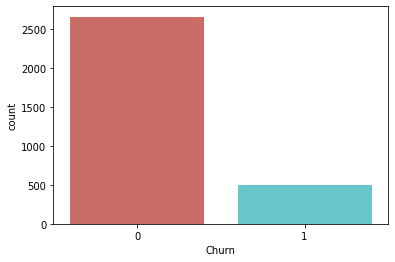

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x = 'Churn', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

Churn,0,1
Complains,,
0,2614,295
1,41,200


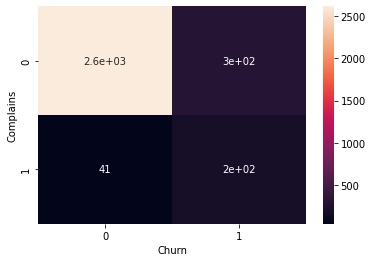

In [7]:
lol = pd.crosstab(df.Complains , df.Churn)
sns.heatmap(lol,annot = True)
lol

## Percentages

In [8]:
Non_Churn = len(df[df['Churn'] == 0])
Churn = len(df[df['Churn'] == 1])

percent_of_Non_Churn =  Non_Churn / (Non_Churn + Churn)
percent_of_Churn = Churn / (Non_Churn + Churn)

print("Non Churn: ", Non_Churn)
print("Churn: ", Churn)

print("percentage of negative is: ", percent_of_Non_Churn * 100)
print("percentage of positive is: ", percent_of_Churn * 100)

Non Churn:  2655
Churn:  495
percentage of negative is:  84.28571428571429
percentage of positive is:  15.714285714285714


## Train Test Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
y_test['Churn'].value_counts()

0    776
1    169
Name: Churn, dtype: int64

## Standardization

In [10]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
y_train['Churn'].value_counts()

0    1879
1     326
Name: Churn, dtype: int64

## Smote

In [12]:
smt = SMOTE('minority',random_state=0)
X_train,y_train = smt.fit_resample(X_train, y_train)


In [13]:
y_train['Churn'].value_counts()

0    1879
1    1879
Name: Churn, dtype: int64

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
print("Logistic Regression: ")
logRegression = LogisticRegression()
logRegression.fit(X_train,y_train)
y_predictionLogistic = logRegression.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predictionLogistic))
print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionLogistic)*100)

Logistic Regression: 
[[659 117]
 [ 25 144]]
Accuracy:  84.97354497354497
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       776
           1       0.55      0.85      0.67       169

    accuracy                           0.85       945
   macro avg       0.76      0.85      0.79       945
weighted avg       0.89      0.85      0.86       945



## RandomForest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier: ")
RandomClassifier = RandomForestClassifier(random_state = 0)
RandomClassifier.fit(X_train, y_train)
y_predictionRandomForest = RandomClassifier.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predictionRandomForest))
print("accuracy: ", metrics.accuracy_score(y_test,y_predictionRandomForest) * 100)


Random Forest Classifier: 
[[753  23]
 [ 23 146]]
accuracy:  95.13227513227514


## DecisionTree Classifier

In [16]:
from sklearn import tree
print("Decision Tree Classifier: ")
DecisionTree = tree.DecisionTreeClassifier(random_state=0)
DecisionTree.fit(X_train,y_train)
y_predictionDecisionTree = DecisionTree.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predictionDecisionTree))
print("accuracy: ", metrics.accuracy_score(y_test,y_predictionDecisionTree) * 100)



Decision Tree Classifier: 
[[744  32]
 [ 38 131]]
accuracy:  92.5925925925926


## K-Nearest Neighbour Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
print("K-Nearest Neighbour Classifier: ")
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_predictionKNN = KNN.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predictionKNN))
print("accuracy: ", metrics.accuracy_score(y_test,y_predictionKNN) * 100)

K-Nearest Neighbour Classifier: 
[[726  50]
 [ 21 148]]
accuracy:  92.48677248677248


## AdaBoostClassifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
print("AdaBoost Classifier: ")
AdaBoost = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=0)
AdaBoost.fit(X_train,y_train)
y_predictionAdaBoost = AdaBoost.predict(X_test)
print(metrics.confusion_matrix(y_test,y_predictionAdaBoost))
print("accuracy: ", metrics.accuracy_score(y_test,y_predictionAdaBoost) * 100)

AdaBoost Classifier: 
[[709  67]
 [ 21 148]]
accuracy:  90.68783068783068


# Voting Classifier

In [19]:
from sklearn.ensemble import VotingClassifier
Voting_Classification = VotingClassifier(estimators=[('lr',logRegression),('rf', RandomClassifier),('dt',DecisionTree),('knn',KNN),('ada',AdaBoost)],weights=[1,3,1,2,1],flatten_transform=True)
Voting_Classification.fit(X_train,y_train)
y_predictionVoting=Voting_Classification.predict(X_test)
print("Voting with SVM,Logistic,Knn,Descision Tree, Adaboost, MLP, Extra Tree:")
print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting))

# aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
# print("Are under Curve for Voting: ", aucVoting)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

Voting with SVM,Logistic,Knn,Descision Tree, Adaboost, MLP, Extra Tree:
Accuracy:  95.23809523809523
[[754  22]
 [ 23 146]]
Report for Voting: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       776
           1       0.87      0.86      0.87       169

    accuracy                           0.95       945
   macro avg       0.92      0.92      0.92       945
weighted avg       0.95      0.95      0.95       945



# AUC From Different Classifiers

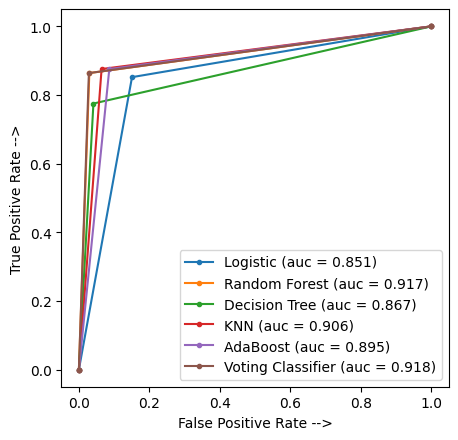

In [20]:
plt.figure(figsize=(5, 5), dpi=100)

logistic_fpr,logistic_tpr,threshold = roc_curve(y_test, y_predictionLogistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

RandomForest_fpr,RandomForest_tpr,threshold = roc_curve(y_test, y_predictionRandomForest)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RandomForest)

DecisionTree_fpr,DecisionTree_tpr,threshold = roc_curve(y_test, y_predictionDecisionTree)
auc_DecisionTree = auc(DecisionTree_fpr, DecisionTree_tpr)
plt.plot(DecisionTree_fpr, DecisionTree_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_DecisionTree)

KNN_fpr,KNN_tpr,threshold = roc_curve(y_test, y_predictionKNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_KNN)

AdaBoost_fpr,AdaBoost_tpr,threshold = roc_curve(y_test, y_predictionAdaBoost)
auc_AdaBoost = auc(AdaBoost_fpr, AdaBoost_tpr)
plt.plot(AdaBoost_fpr, AdaBoost_tpr, marker='.', label='AdaBoost (auc = %0.3f)' % auc_AdaBoost)

VotingClassifier_fpr,VotingClassifier_tpr,threshold = roc_curve(y_test, y_predictionVoting)
auc_VotingClassifier = auc(VotingClassifier_fpr, VotingClassifier_tpr)
plt.plot(VotingClassifier_fpr, VotingClassifier_tpr, marker='.', label='Voting Classifier (auc = %0.3f)' % auc_VotingClassifier)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()